In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from plotly import graph_objects as go

In [52]:
netflix = pd.read_csv('/content/netflix_titles.csv')

In [ ]:
netflix.head(5)

In [54]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [55]:
netflix['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [182]:
netflix_movie = netflix[netflix['type'] == 'Movie'].copy()
netflix_TVShow = netflix[netflix['type'] == 'TV Show'].copy()

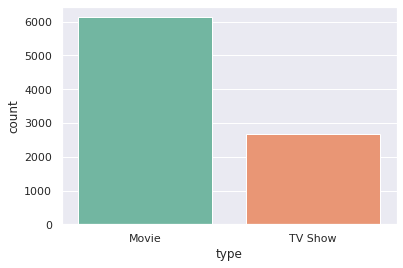

In [183]:
sns.set(style='darkgrid')
ax = sns.countplot(x='type', data=netflix, palette='Set2')

In [184]:
netflix_TVShow_vc = netflix_TVShow['duration'].value_counts()
netflix_TVShow_vc

1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

In [185]:
netflix_movie_vc = netflix_movie['duration'].value_counts()
netflix_movie_vc

90 min     152
94 min     146
93 min     146
97 min     146
91 min     144
          ... 
212 min      1
8 min        1
186 min      1
193 min      1
191 min      1
Name: duration, Length: 205, dtype: int64

In [188]:
ind = netflix_movie[netflix_movie['duration'].isna()].index
netflix_movie[netflix_movie['duration'].isna()]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [189]:
netflix_movie.dropna(subset=['duration'], inplace=True)
netflix_movie['duration'].isna().sum()

In [ ]:
def from_object_in_int(duration):
    if type(duration) == str:
        return int(duration.split(sep=' ')[0])
    return duration


netflix_movie['duration'] = netflix_movie['duration'].apply(from_object_in_int)
netflix_movie

In [195]:
netflix_movie_vc = netflix_movie['duration'].value_counts().sort_index()
netflix_movie_vc

3      1
5      1
8      1
9      1
10     1
      ..
233    1
237    1
253    1
273    1
312    1
Name: duration, Length: 205, dtype: int64

In [196]:
fig = go.Figure( [go.Bar(x=netflix_TVShow_vc.index, y=netflix_TVShow_vc.values)] )
fig.show()

In [200]:
fig = go.Figure( [go.Bar(x=netflix_movie_vc.index, y=netflix_movie_vc.values)] )
fig.show()

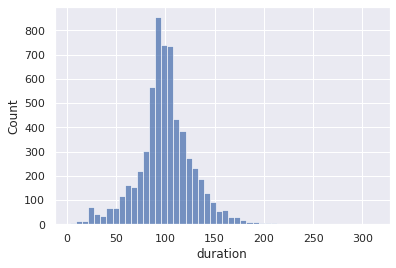

In [223]:
sns.histplot(netflix_movie['duration'], bins=50)

In [213]:
netflix_movie['duration'].describe()

count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

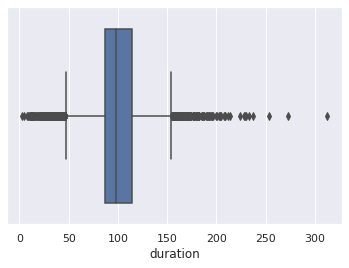

In [216]:
sns.boxplot(x=netflix_movie['duration'])

In [219]:
from scipy import stats

k2, p = stats.normaltest(netflix_movie['duration'])
p

7.621223665605874e-82

In [222]:
stats.kstest(netflix_movie['duration'], 'norm', alternative='two-sided')

KstestResult(statistic=0.999836527969838, pvalue=0.0)

> # **Проверить является ли это распределение нормальным, подсчитать среднее, дисперсию и тд.**

